In [118]:
import sys 
sys.path.append("..") # this is to import elm.py
import elm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import scipy
import os
from sklearn.preprocessing import StandardScaler

测试elm是否正确

In [59]:
stdsc = StandardScaler()
# load dataset
iris = load_iris()
irx, iry = stdsc.fit_transform(iris.data), iris.target
x_train, x_test, y_train, y_test = train_test_split(irx, iry, test_size=0.2)
# built model and train
model = elm.elm(hidden_units=35, activation_function='relu', random_type='normal', x=x_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
print("classifier train accuracy:", train_accuracy)
print('classifier test accuracy:', model.score(x_test, y_test))

classifier train accuracy: 0.9666666666666667
classifier test accuracy: 0.9666666666666667


## 导入数据

训练集

In [60]:
train_list = []
train_path = 'df_list\\train'
for df_name in os.listdir(train_path):
    file_path = os.path.join(train_path, df_name)
    tmp_df = pd.read_csv(file_path, index_col=0)
    fea = tmp_df.columns.difference(['class', 'source', 'target'])
    tmp_df[fea] = StandardScaler().fit_transform(tmp_df[fea])
    train_list.append(tmp_df)
train_list[0]

,source,target,class,AA,ADP,CAA,CAR,CCLP,CN,CNDP,CRA,HDI,HPI,Jaccard,LHN_I,NLC,RA,Salton,Sorensen
0,LouisianaTech,Missouri,0,-0.553949,-0.567619,-0.619147,-0.560295,-0.574483,-0.535939,-0.620415,-0.621402,-0.494217,-0.524099,-0.554759,-0.479218,-0.642237,-0.578221,-0.509298,-0.508627
1,Memphis,Cincinnati,1,1.033198,1.047237,0.526371,0.273279,0.665717,1.014633,0.535883,0.543334,1.045291,0.936569,0.883273,0.960991,0.481664,1.057759,0.991954,0.993580
2,WestVirginia,TexasChristian,0,-0.925889,-0.927296,-0.619147,-0.560295,-0.855959,-0.923582,-0.620415,-0.621402,-0.928438,-0.936082,-0.868176,-0.939021,-0.720416,-0.928334,-0.932727,-0.932327
3,Arizona,WashingtonState,1,1.774619,1.762464,1.318048,1.440284,1.945152,1.789920,1.314724,1.311793,1.834782,1.685630,1.910791,1.720995,1.767302,1.751619,1.761826,1.763942
4,MiddleTennesseeState,Georgia,0,-0.540453,-0.543634,-0.619147,-0.560295,-0.548894,-0.535939,-0.620415,-0.621402,-0.494217,-0.478323,-0.537347,-0.428129,-0.579693,-0.546393,-0.486393,-0.486327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,TexasA&M,Clemson,0,-0.925889,-0.927296,-0.619147,-0.560295,-0.855959,-0.923582,-0.620415,-0.621402,-0.928438,-0.936082,-0.868176,-0.939021,-0.720416,-0.928334,-0.932727,-0.932327
856,Texas,AlabamaBirmingham,0,-0.080036,-0.029610,-0.619147,-0.560295,-0.318474,-0.148296,-0.620415,-0.621402,-0.138946,-0.112116,-0.241342,-0.103015,-0.559894,0.016970,-0.125278,-0.125280
857,Louisville,Army,1,1.017244,1.019125,0.516359,0.273279,0.585539,1.014633,0.518191,0.519236,1.045291,1.123835,0.992739,1.150992,0.383361,1.019565,1.085895,1.085289
858,Auburn,BallState,0,-0.139063,-0.131860,-0.619147,-0.560295,-0.267418,-0.148296,-0.620415,-0.621402,-0.138946,-0.112116,-0.241342,-0.103015,-0.507160,-0.126258,-0.125278,-0.125280


测试集

In [122]:
test_path = 'df_list\\test\\test.csv'
df_test = pd.read_csv(test_path, index_col=0)
df_test_origin = df_test.copy() # 原始的df_test
fea = df_test.columns.difference(['class', 'source', 'target'])
df_test[fea] = StandardScaler().fit_transform(df_test[fea])
df_test

,source,target,class,AA,ADP,CAA,CAR,CCLP,CN,CNDP,CRA,HDI,HPI,Jaccard,LHN_I,NLC,RA,Salton,Sorensen
0,Buffalo,Syracuse,1,-0.456307,-0.448087,-0.573350,-0.521346,-0.277533,-0.466735,-0.574779,-0.575935,-0.466375,-0.496801,-0.521221,-0.495972,-0.319604,-0.441486,-0.481808,-0.481189
1,Northwestern,Michigan,1,1.115666,1.093113,0.564488,0.337066,0.905980,1.144822,0.554293,0.545832,1.149349,1.027657,0.973689,1.024102,0.704149,1.073990,1.089509,1.091378
2,Buffalo,Ohio,1,1.162863,1.176495,1.091539,0.704956,0.968924,1.144822,1.107998,1.120993,1.149349,1.218214,1.085170,1.214111,0.943551,1.186492,1.185377,1.184983
3,Utah,California,1,-0.472890,-0.477310,-0.573350,-0.521346,-0.341363,-0.466735,-0.574779,-0.575935,-0.466375,-0.496801,-0.521221,-0.495972,-0.358762,-0.481193,-0.481808,-0.481189
4,Purdue,MichiganState,1,1.502283,1.467019,0.558753,0.508748,0.913959,1.547711,0.544073,0.532235,1.553280,1.408771,1.464206,1.404121,0.608585,1.437969,1.482339,1.484520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LouisianaMonroe,Temple,0,-0.873537,-0.876150,-0.573350,-0.521346,-0.804130,-0.869624,-0.574779,-0.575935,-0.870306,-0.877915,-0.810010,-0.875990,-0.674849,-0.878261,-0.874638,-0.874331
362,Kentucky,SanJoseState,0,-0.873537,-0.876150,-0.573350,-0.521346,-0.804130,-0.869624,-0.574779,-0.575935,-0.870306,-0.877915,-0.810010,-0.875990,-0.674849,-0.878261,-0.874638,-0.874331
363,Kentucky,WashingtonState,0,-0.873537,-0.876150,-0.573350,-0.521346,-0.804130,-0.869624,-0.574779,-0.575935,-0.870306,-0.877915,-0.810010,-0.875990,-0.674849,-0.878261,-0.874638,-0.874331
364,PennState,IowaState,0,-0.486919,-0.502244,-0.573350,-0.521346,-0.471682,-0.466735,-0.574779,-0.575935,-0.500036,-0.496801,-0.534348,-0.527640,-0.514292,-0.514282,-0.498532,-0.498282


In [126]:
# 将df_test的特征放缩到0-1，以方便计算熵
df_test_origin[fea] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_test_origin[fea])
df_test_origin

,source,target,class,AA,ADP,CAA,CAR,CCLP,CN,CNDP,CRA,HDI,HPI,Jaccard,LHN_I,NLC,RA,Salton,Sorensen
0,Buffalo,Syracuse,1,0.128184,0.130571,0.000000,0.000000,0.144843,0.125,0.000000,0.000000,0.125000,0.113636,0.077381,0.113636,0.088796,0.132530,0.119183,0.119318
1,Northwestern,Michigan,1,0.611137,0.600681,0.325066,0.208333,0.470373,0.625,0.318855,0.313927,0.625000,0.568182,0.477941,0.568182,0.344689,0.592369,0.595914,0.596591
2,Buffalo,Ohio,1,0.625637,0.626114,0.475637,0.297619,0.487686,0.625,0.475224,0.474886,0.625000,0.625000,0.507812,0.625000,0.404529,0.626506,0.625000,0.625000
3,Utah,California,1,0.123089,0.121657,0.000000,0.000000,0.127286,0.125,0.000000,0.000000,0.125000,0.113636,0.077381,0.113636,0.079008,0.120482,0.119183,0.119318
4,Purdue,MichiganState,1,0.729916,0.714732,0.323427,0.250000,0.472568,0.750,0.315969,0.310122,0.750000,0.681818,0.609375,0.681818,0.320803,0.702811,0.715097,0.715909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LouisianaMonroe,Temple,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
362,Kentucky,SanJoseState,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
363,Kentucky,WashingtonState,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
364,PennState,IowaState,0,0.118779,0.114052,0.000000,0.000000,0.091441,0.125,0.000000,0.000000,0.114583,0.113636,0.073864,0.104167,0.040132,0.110442,0.114109,0.114130


##  观察特征的相关性

<AxesSubplot:>

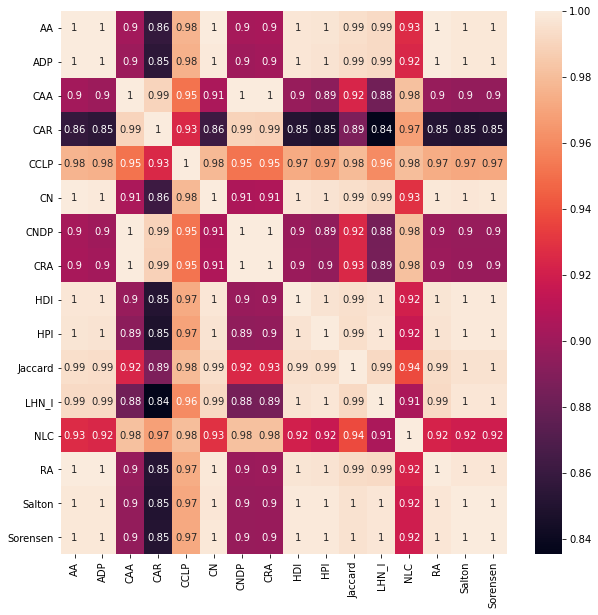

In [62]:
%matplotlib inline
df_tmp = train_list[0]
complete_features=df_tmp.loc[:,df_tmp.columns.difference(['source','taregt','class'])]
# 绘制热力图
plt.figure(figsize=(10,10))
sns.heatmap(complete_features.corr(),annot=True)

## 观察多个训练集的特征分布

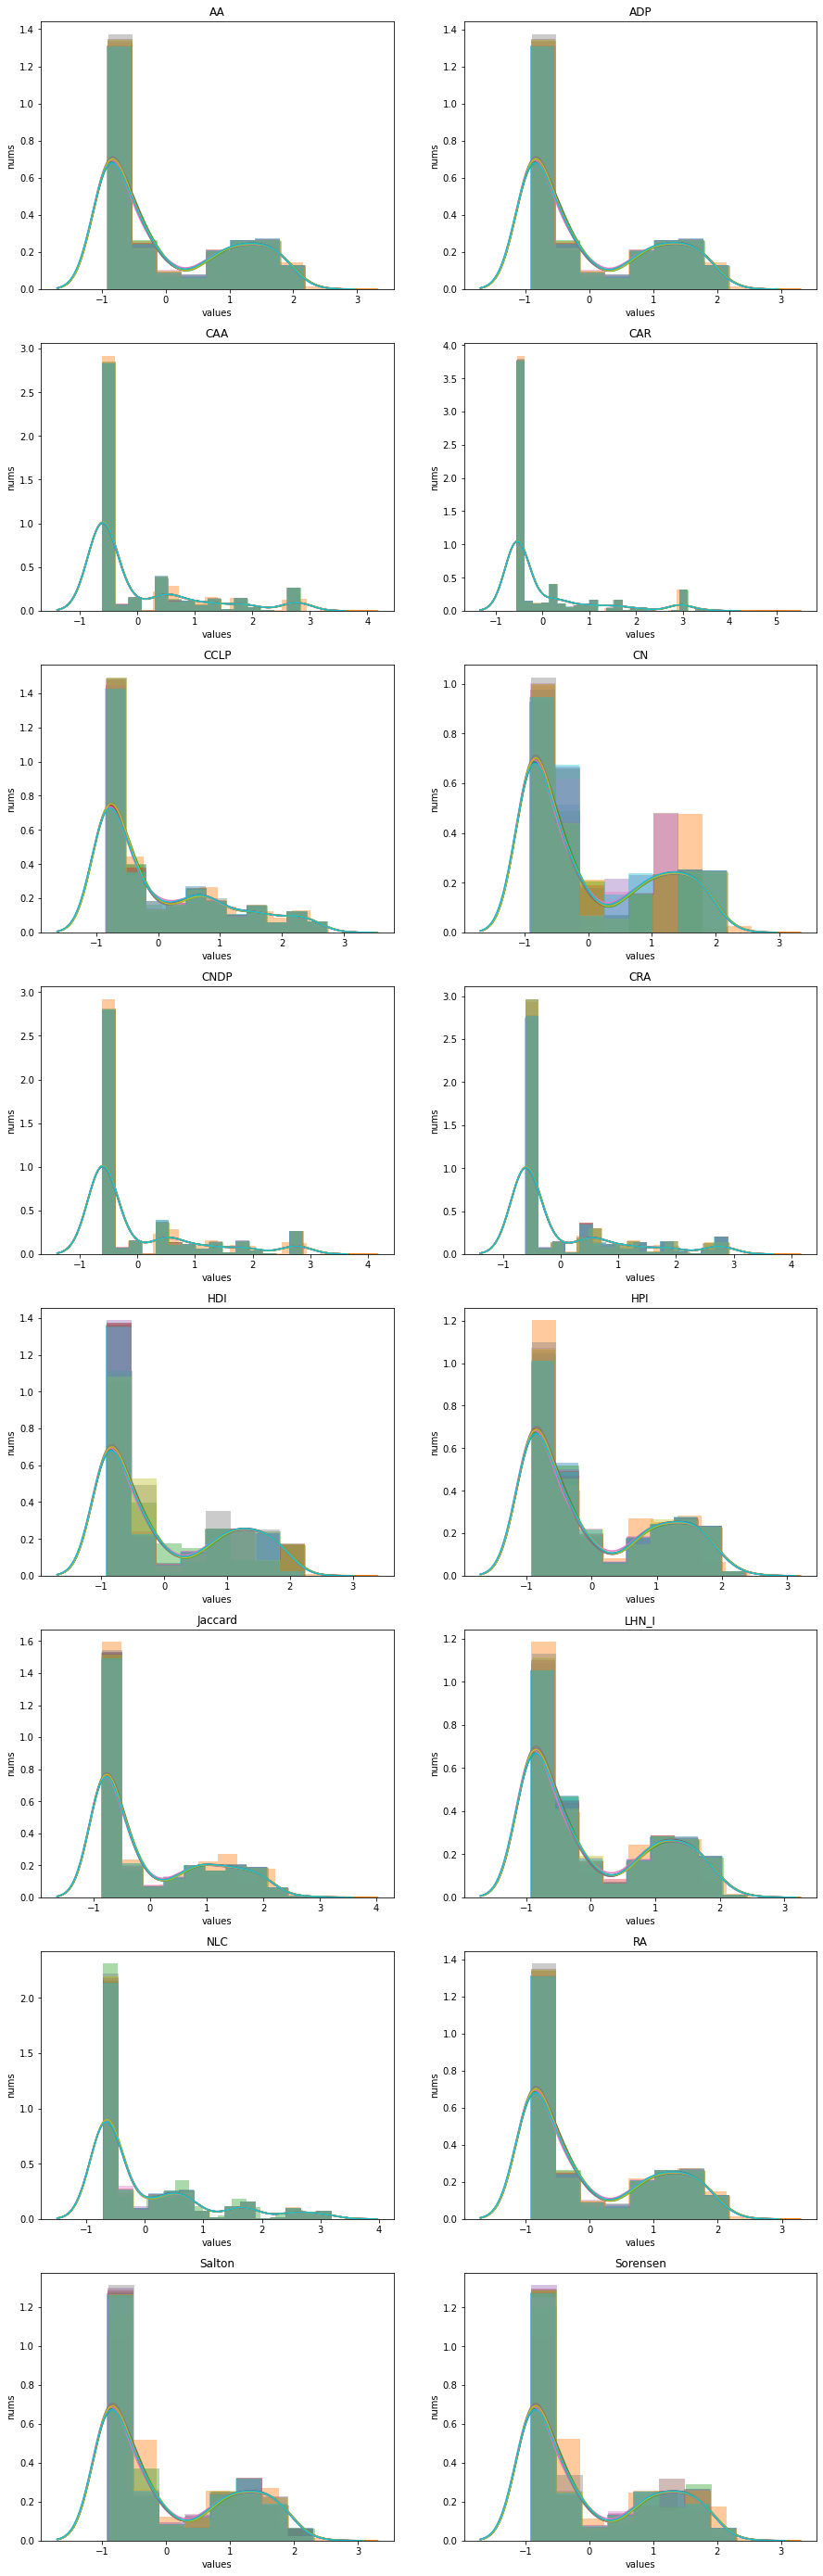

In [63]:
import warnings
warnings.filterwarnings('ignore')

features_set=list(df_tmp.columns.difference(['source','target','class']))
fig, axes = plt.subplots(ncols=2, nrows=8,figsize=[15,50])
for i, ax, fea in zip(range(16), axes.flat,features_set):
    ax.set_title(fea)
    ax.set_xlabel('values')
    ax.set_ylabel('nums')
    for df_train in train_list:
        sns.distplot(df_train[fea].values,
            hist=True,kde=True, ax=ax)
plt.show()

## 训练模型

In [64]:
def acc_curve(n,X_train,X_test,y_train,y_test,C=0.1):
    '''
    function to fit a model with hidden_layer's num equals to n
    @param
    * X_train,X_test,y_train,y_test is the datasets used to fit the model
    * C is the regular paramter
    * n is the hidden_layer's num
    '''
    model=elm.elm(
        hidden_units=n, 
        activation_function='sigmoid', 
        random_type='normal', 
        x=X_train, y=y_train, 
        C=C, elm_type='clf'
    )
    _, train_accuracy, _ = model.fit('solution2')
    test_accuracy=model.score(X_test,y_test)
    return (train_accuracy,test_accuracy)

def plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.01,title='with all features',max_hidden_units=300):
    '''
    function to plot the training and testing accuracy curve
    @param
    * X_train,X_test,y_train,y_test is the datasets used to fit the model
    * C is the regular paramter
    '''
    train_accuracy_list=[]
    test_accuracy_list=[]
    x_plot=[*range(2,max_hidden_units,2)]
    for i in range(2,max_hidden_units,2):
        acc_train,acc_test=acc_curve(i,X_train,X_test,y_train,y_test,C)
        train_accuracy_list.append(acc_train)
        test_accuracy_list.append(acc_test)
    plt.figure(figsize=(30,10))
    plt.plot(x_plot,train_accuracy_list,color='r',label='train_accuracy')
    plt.plot(x_plot,test_accuracy_list,color='b',label='test_accuracy')
    plt.legend()
    plt.xticks([*range(2,max_hidden_units,20)])
    plt.grid()
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('nums of hidden layer')
    plt.show()

1.使用全部特征

In [65]:
# 特征集合
feature_full = df_test.columns.difference(['source','target','class'])
feature_full

Index(['AA', 'ADP', 'CAA', 'CAR', 'CCLP', 'CN', 'CNDP', 'CRA', 'HDI', 'HPI',
       'Jaccard', 'LHN_I', 'NLC', 'RA', 'Salton', 'Sorensen'],
      dtype='object')

训练集df转化为numpy数组

In [66]:
Train_data = [(item[feature_full].values, item['class'].values) for item in train_list]
print("X shape: ", Train_data[0][0].shape)
print("y shape: ", Train_data[0][1].shape)

X shape:  (860, 16)
y shape:  (860,)


测试集df转化为numpy数组

In [67]:
X_test = df_test[feature_full].values
y_test = df_test['class'].values
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_test shape:  (366, 16)
y_test shape:  (366,)


开始训练模型

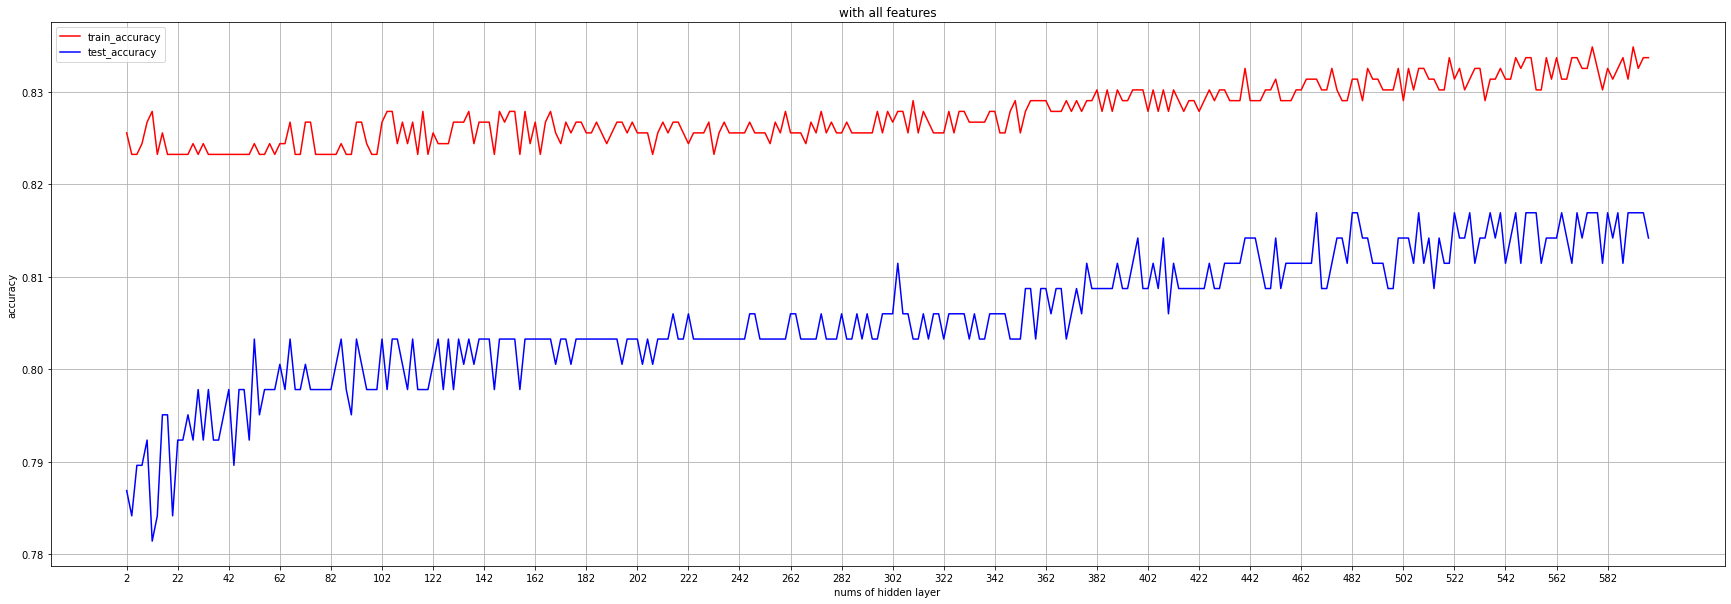

In [69]:
plot_train_test_curve(Train_data[0][0], X_test, Train_data[0][1], y_test, C=0.1, max_hidden_units=600)

测试一下AUC

由于从上图看出，隐藏层为330时，elm模型基本上收敛了，所以下面采用隐藏层节点为330的elm模型

In [107]:
hidden_units = 330
C = 0.1
model_list = []
for X_train, y_train in Train_data:
    model = elm.elm(
        hidden_units=hidden_units, 
        activation_function='sigmoid', 
        random_type='normal', 
        x=X_train, y=y_train, 
        C=C, elm_type='clf'
    )
    model.fit('solution2')
    model_list.append(model)

In [108]:
test_softmax_list = []
for model in model_list:
    res = model.predict_softmax(X_test)
    test_softmax_list.append(res)
test_softmax_list = np.array(test_softmax_list)
print('test_softmax_list shape: ', test_softmax_list.shape)

# 将K个ELM的预测结果去平均
softmax_list_mean = np.mean(test_softmax_list, axis=0)
print('softmax_list_mean shape: ',softmax_list_mean.shape)

test_softmax_list shape:  (10, 366, 2)
softmax_list_mean shape:  (366, 2)


得到K个elm的softmax平均预测结果之后，我们计算熵

In [156]:
# AUC计算函数
def AUC_(test1, test2):
    AUC_list={'n1':0,'n2':0,'n3':0}
    for i in range(N):
        for j in range(M):
            edge_d1=test1[i]
            edge_d2=test2[j]
            if edge_d1 < edge_d2:
                AUC_list['n1']=AUC_list['n1']+1
            elif edge_d1 == edge_d2:
                AUC_list['n2']=AUC_list['n2']+1
            else:
                AUC_list['n3']=AUC_list['n3']+1
    return (AUC_list['n1']+0.5*AUC_list['n2'])/(N*M)

def entropy_(a,b):
    if (a==0 and b==1) or (a==1 and b==0):
        return 0.0
    return -(a*np.log2(a)+b*np.log2(b))

In [112]:
# 计算测试集的预测结果的熵
test_entropy = [entropy_(item[0], item[1]) for item in softmax_list_mean]
# 计算AUC
N = df_test['class'].values.sum()
M = df_test.shape[0]-N
test_d1=test_entropy[:N]
test_d2=test_entropy[M:]
print('AUC = ', AUC_(test_d1, test_d2))

AUC =  0.7193406790289348


传统方法

In [131]:
# AUC_list = []
# features = list(feature_full)
# for fea in features:
#     test_data = df_test[fea].values
#     AUC_list.append(AUC_(test_data))

In [130]:
# plt.figure(figsize=[15,10])
# plt.bar(features, AUC_list)

In [134]:
df_test_origin

,source,target,class,AA,ADP,CAA,CAR,CCLP,CN,CNDP,CRA,HDI,HPI,Jaccard,LHN_I,NLC,RA,Salton,Sorensen
0,Buffalo,Syracuse,1,0.128184,0.130571,0.000000,0.000000,0.144843,0.125,0.000000,0.000000,0.125000,0.113636,0.077381,0.113636,0.088796,0.132530,0.119183,0.119318
1,Northwestern,Michigan,1,0.611137,0.600681,0.325066,0.208333,0.470373,0.625,0.318855,0.313927,0.625000,0.568182,0.477941,0.568182,0.344689,0.592369,0.595914,0.596591
2,Buffalo,Ohio,1,0.625637,0.626114,0.475637,0.297619,0.487686,0.625,0.475224,0.474886,0.625000,0.625000,0.507812,0.625000,0.404529,0.626506,0.625000,0.625000
3,Utah,California,1,0.123089,0.121657,0.000000,0.000000,0.127286,0.125,0.000000,0.000000,0.125000,0.113636,0.077381,0.113636,0.079008,0.120482,0.119183,0.119318
4,Purdue,MichiganState,1,0.729916,0.714732,0.323427,0.250000,0.472568,0.750,0.315969,0.310122,0.750000,0.681818,0.609375,0.681818,0.320803,0.702811,0.715097,0.715909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LouisianaMonroe,Temple,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
362,Kentucky,SanJoseState,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
363,Kentucky,WashingtonState,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
364,PennState,IowaState,0,0.118779,0.114052,0.000000,0.000000,0.091441,0.125,0.000000,0.000000,0.114583,0.113636,0.073864,0.104167,0.040132,0.110442,0.114109,0.114130


In [135]:
features = list(feature_full)
for fea in features:
    df_test_origin[fea+'_reverse']=1-df_test_origin[fea]

In [141]:
print('AA: ', df_test_origin.loc[0,'AA'])
print('AA reverse: ', df_test_origin.loc[0,'AA_reverse'])

AA:  0.12818437484349043
AA reverse:  0.8718156251565096


In [143]:
tmp_AA = df_test_origin.loc[:,['AA', 'AA_reverse']].values

In [158]:
# 计算测试集的预测结果的熵
AA_entropy = [entropy_(item[0], item[1]) for item in tmp_AA]
# 计算AUC
N = df_test['class'].values.sum()
M = df_test.shape[0]-N
test_AA1=AA_entropy[:N]
test_AA0=AA_entropy[M:]
print('AUC = ', AUC_(test_AA1, test_AA0))

AUC =  0.1964973573412165
